In [2]:
## Example 4-1: Basic Teleportation

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math
## Uncomment this to see diagrams when running in a notebook
%matplotlib inline

# Set up the program
alice = QuantumRegister(1, name='alice')
ep    = QuantumRegister(1, name='ep')
bob   = QuantumRegister(1, name='bob')
alice_c = ClassicalRegister(1, name='alicec')
ep_c    = ClassicalRegister(1, name='epc')
bob_c   = ClassicalRegister(1, name='bobc')
qc = QuantumCircuit(alice, ep, bob, alice_c, ep_c, bob_c)

# entangle
qc.h(ep)
qc.cx(ep, bob)
qc.barrier()

# prep payload
qc.reset(alice)
qc.h(alice)
qc.rz(math.radians(45), alice)
qc.h(alice)
qc.barrier()

# send
qc.cx(alice, ep)
qc.h(alice)
qc.measure(alice, alice_c)
qc.measure(ep, ep_c)
qc.barrier()

# receive
qc.z(bob).c_if(alice_c, 1)
qc.x(bob).c_if(ep_c, 1)

# verify
qc.h(bob)
qc.rz(math.radians(-45), bob)
qc.h(bob)
qc.measure(bob, bob_c)

## That's the program. Everything below runs and draws it.

simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=1024)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(qc))

qc.draw()        # draw the circuit

{'0 0 0': 268, '0 0 1': 229, '0 1 0': 255, '0 1 1': 272}


░      ┌───┐┌─────────┐┌───┐ ░      ┌───┐┌─┐ ░        »
   alice: ───────────░──|0>─┤ H ├┤ Rz(π/4) ├┤ H ├─░───■──┤ H ├┤M├─░────────»
          ┌───┐      ░      └───┘└─────────┘└───┘ ░ ┌─┴─┐└┬─┬┘└╥┘ ░        »
      ep: ┤ H ├──■───░────────────────────────────░─┤ X ├─┤M├──╫──░────────»
          └───┘┌─┴─┐ ░                            ░ └───┘ └╥┘  ║  ░  ┌───┐ »
     bob: ─────┤ X ├─░────────────────────────────░────────╫───╫──░──┤ Z ├─»
               └───┘ ░                            ░        ║   ║  ░  └─╥─┘ »
                                                           ║   ║    ┌──╨──┐»
alicec: 1/═════════════════════════════════════════════════╬═══╩════╡ 0x1 ╞»
                                                           ║   0    └─────┘»
   epc: 1/═════════════════════════════════════════════════╩═══════════════»
                                                           0               »
  bobc: 1/═════════════════════════════════════════════════════════════════»
                                                                           »
«                                          
«   alice: ────────────────────────────────
«                                          
«      ep: ────────────────────────────────
«           ┌───┐ ┌───┐┌──────────┐┌───┐┌─┐
«     bob: ─┤ X ├─┤ H ├┤ Rz(-π/4) ├┤ H ├┤M├
«           └─╥─┘ └───┘└──────────┘└───┘└╥┘
«alicec: 1/═══╬══════════════════════════╬═
«          ┌──╨──┐                       ║ 
«   epc: 1/╡ 0x1 ╞═══════════════════════╬═
«          └─────┘                       ║ 
«  bobc: 1/══════════════════════════════╩═
«                                        0

Measurement outcomes: {'0 1 0': 5151, '0 0 0': 4849}
Occurrences where Alice is 0 and Bob is 0: 10000 out of 10000 shots
Success percentage: 100.00%


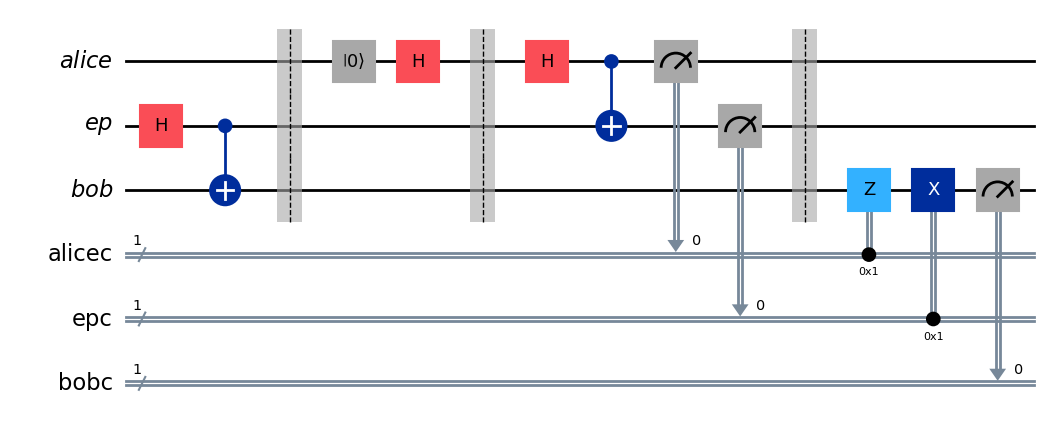

In [35]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math
## Uncomment this to see diagrams when running in a notebook
%matplotlib inline

# Set up the quantum registers and classical registers
alice = QuantumRegister(1, name='alice')
ep = QuantumRegister(1, name='ep')  # Entanglement pair qubit
bob = QuantumRegister(1, name='bob')

alice_c = ClassicalRegister(1, name='alicec')
ep_c = ClassicalRegister(1, name='epc')
bob_c = ClassicalRegister(1, name='bobc')

# Create a quantum circuit with the registers
qc = QuantumCircuit(alice, ep, bob, alice_c, ep_c, bob_c)

# Step 1: Entangle the qubits in the entanglement pair
qc.h(ep)        # Apply Hadamard gate to create superposition on 'ep'
qc.cx(ep, bob)  # Apply CNOT gate to entangle 'ep' with 'bob'
qc.barrier()    # Barrier for visualization purposes

# Step 2: Prepare Alice's qubit state (this is the state to be teleported)
qc.reset(alice)  # Reset Alice's qubit to |0>
#qc.x(alice)   #to send |1>
#qc.ry(math.radians(45), alice)
qc.h(alice)      # Apply Hadamard again to create the state to teleport
qc.barrier()

# Step 3: Perform Bell state measurement on Alice's qubit and the entanglement qubit
qc.h(alice)       # Apply Hadamard to Alice's qubit
qc.cx(alice, ep)  # Apply CNOT with Alice's qubit as control and 'ep' as target
qc.measure(alice, alice_c)  # Measure Alice's qubit
qc.measure(ep, ep_c)        # Measure the entanglement qubit 'ep'
qc.barrier()

# Step 4: Apply conditional operations on Bob's qubit based on measurement results
qc.z(bob).c_if(alice_c, 1)  # Apply Z gate on Bob's qubit if Alice's measurement result is 1
qc.x(bob).c_if(ep_c, 1)     # Apply X gate on Bob's qubit if 'ep' measurement result is 1

# Step 5: Verify Bob's qubit (Optional: Apply inverse of the state preparation on Bob's qubit)
#qc.h(bob)       # Apply Hadamard to revert Bob's qubit to the original state
#qc.rx(math.radians(-45), bob)  # Apply inverse rotation
#qc.h(bob)       # Apply Hadamard again
#qc.x(bob)
qc.measure(bob, bob_c)  # Measure Bob's qubit to verify teleportation

# Execute the quantum circuit on a simulator
simulator = AerSimulator()
# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()

# Get and print the measurement results
counts = result.get_counts(qc)
print('Measurement outcomes:', counts)
# Analyze how many times Alice was 0 and Bob was also 0
successful_count = 0
for key, val in counts.items():
    alice_result, ep_result, bob_result = (int(bit) for bit in key.split())
    if alice_result == 0 and bob_result == 0:
        successful_count += val

total_shots = sum(counts.values())  # Total number of shots

# Calculate the percentage of successful teleportations
success_percentage = (successful_count / total_shots) * 100

print(f"Occurrences where Alice is 0 and Bob is 0: {successful_count} out of {total_shots} shots")
print(f"Success percentage: {success_percentage:.2f}%")

# Draw the quantum circuit for visualization
qc.draw(output='mpl')  # Use 'mpl' for a better graphical representation (if in a Jupyter notebook)
